In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
import openpyxl

In [3]:
#importar datos

liga_esp = pd.read_excel("partidos_NBA.xlsx")

In [4]:
liga_esp.columns

Index(['num_partido', 'CASA', 'VISITA', 'c', 'v', 'resultado'], dtype='object')

In [5]:
display(liga_esp)

,num_partido,CASA,VISITA,c,v,resultado
0,1,Minnesota,Dallas,111,99,1
1,2,Dallas,Minnesota,96,104,2
2,3,Golden State,LA Lakers,125,108,1
3,4,Milwaukee,Chicago,105,102,1
4,5,Detroit,Phoenix,126,130,2
...,...,...,...,...,...,...
9254,9255,Indiana,Milwaukee,120,98,1
9255,9256,Philadelphia,New York,115,118,2
9256,9257,Orlando,Cleveland,103,96,1
9257,9258,Denver,Minnesota,103,96,1


In [6]:
liga_esp["CASA"] = liga_esp["CASA"].str.replace(" ", "")
liga_esp["VISITA"] = liga_esp["VISITA"].str.replace(" ", "")

In [7]:
liga_esp.rename(columns = {'CASA5':'CASA', 'VISITA6':'VISITA'}, inplace = True)
liga_esp.head()

,num_partido,CASA,VISITA,c,v,resultado
0,1,Minnesota,Dallas,111,99,1
1,2,Dallas,Minnesota,96,104,2
2,3,GoldenState,LALakers,125,108,1
3,4,Milwaukee,Chicago,105,102,1
4,5,Detroit,Phoenix,126,130,2


In [8]:
liga_espcasa = liga_esp.groupby('CASA')[['c', 'v']].mean()

liga_espvisita= liga_esp.groupby('VISITA')[['v', 'c']].mean()

In [9]:
liga_espcasa.rename(columns = {'c':'GFc', 'v':'GCc'}, inplace = True)
liga_espvisita.rename(columns = {'v':'GFv', 'c':'GCv'}, inplace = True)

In [10]:
liga_espcasa_visita = liga_espcasa.merge(liga_espvisita, left_index=True, right_index=True)
liga_espcasa_visita = liga_espcasa_visita.rename_axis("CASA")
liga_espcasa_visita

,GFc,GCc,GFv,GCv
CASA,,,,
Atlanta,120.928339,119.723127,114.522727,120.386364
Boston,122.726384,107.563518,117.792208,109.954545
Brooklyn,112.930233,111.162791,108.886288,115.351171
Charlotte,108.093023,116.372093,105.266667,116.546667
Chicago,112.088889,111.955556,112.098361,115.534426
Cleveland,113.569620,108.825949,110.336634,109.864686
Dallas,118.246667,114.553333,116.183871,115.519355
Denver,117.874194,108.180645,111.180380,110.575949
Detroit,110.545775,118.514085,109.933333,119.511111


In [11]:
promedioc=liga_esp[['c','v']].mean().mean()
promediov=liga_esp['v'].mean()
print('promedioc:',promedioc)
print('promediov:',promediov)
ventaja_casa= promedioc-promediov
print('ventaja casa:', ventaja_casa)

promedioc: 113.95199265579436
promediov: 112.85678799006372
ventaja casa: 1.095204665730634


In [12]:
liga_espcasa_visita['PAc']=liga_espcasa_visita['GFc']/promedioc
liga_espcasa_visita['PDc']=liga_espcasa_visita['GCc']/promediov
liga_espcasa_visita['PAv']=liga_espcasa_visita['GFv']/promediov
liga_espcasa_visita['PDv']=liga_espcasa_visita['GCv']/promedioc
liga_espcasa_visita

,GFc,GCc,GFv,GCv,PAc,PDc,PAv,PDv
CASA,,,,,,,,
Atlanta,120.928339,119.723127,114.522727,120.386364,1.061222,1.060841,1.014762,1.056466
Boston,122.726384,107.563518,117.792208,109.954545,1.077001,0.953097,1.043732,0.964920
Brooklyn,112.930233,111.162791,108.886288,115.351171,0.991033,0.984990,0.964818,1.012279
Charlotte,108.093023,116.372093,105.266667,116.546667,0.948584,1.031148,0.932746,1.022770
Chicago,112.088889,111.955556,112.098361,115.534426,0.983650,0.992014,0.993280,1.013887
Cleveland,113.569620,108.825949,110.336634,109.864686,0.996644,0.964284,0.977669,0.964131
Dallas,118.246667,114.553333,116.183871,115.519355,1.037688,1.015033,1.029481,1.013755
Denver,117.874194,108.180645,111.180380,110.575949,1.034420,0.958566,0.985146,0.970373
Detroit,110.545775,118.514085,109.933333,119.511111,0.970108,1.050128,0.974096,1.048785


In [13]:
tabla_completa = pd.merge(liga_esp, liga_espcasa_visita[['GFc','PAc','PDc']], on='CASA')

tabla_completa

,num_partido,CASA,VISITA,c,v,resultado,GFc,PAc,PDc
0,1,Minnesota,Dallas,111,99,1,112.561290,0.987796,0.916263
1,224,Minnesota,RA'ANANA,138,111,1,112.561290,0.987796,0.916263
2,255,Minnesota,RA'ANANA,138,111,1,112.561290,0.987796,0.916263
3,282,Minnesota,RA'ANANA,138,111,1,112.561290,0.987796,0.916263
4,313,Minnesota,RA'ANANA,138,111,1,112.561290,0.987796,0.916263
...,...,...,...,...,...,...,...,...,...
9241,9073,Orlando,Milwaukee,113,88,1,112.023026,0.983072,0.923096
9242,9094,Orlando,Milwaukee,113,88,1,112.023026,0.983072,0.923096
9243,9233,Orlando,Cleveland,121,83,1,112.023026,0.983072,0.923096
9244,9239,Orlando,Cleveland,112,89,1,112.023026,0.983072,0.923096


In [14]:
tabla_completa = pd.merge(tabla_completa, liga_espcasa_visita[['GFv','PAv','PDv']], left_on='VISITA', right_on='CASA')
tabla_completa

,num_partido,CASA,VISITA,c,v,resultado,GFc,PAc,PDc,GFv,PAv,PDv
0,1,Minnesota,Dallas,111,99,1,112.561290,0.987796,0.916263,116.183871,1.029481,1.013755
1,3529,Minnesota,Dallas,118,110,1,112.561290,0.987796,0.916263,116.183871,1.029481,1.013755
2,3570,Minnesota,Dallas,118,110,1,112.561290,0.987796,0.916263,116.183871,1.029481,1.013755
3,3608,Minnesota,Dallas,118,110,1,112.561290,0.987796,0.916263,116.183871,1.029481,1.013755
4,3652,Minnesota,Dallas,118,110,1,112.561290,0.987796,0.916263,116.183871,1.029481,1.013755
...,...,...,...,...,...,...,...,...,...,...,...,...
9187,4239,Orlando,Minnesota,92,113,2,112.023026,0.983072,0.923096,114.045603,1.010534,0.957858
9188,4278,Orlando,Minnesota,92,113,2,112.023026,0.983072,0.923096,114.045603,1.010534,0.957858
9189,4323,Orlando,Minnesota,92,113,2,112.023026,0.983072,0.923096,114.045603,1.010534,0.957858
9190,4367,Orlando,Minnesota,92,113,2,112.023026,0.983072,0.923096,114.045603,1.010534,0.957858


In [15]:
tabla_completa['gc']=tabla_completa['GFc']*(((tabla_completa['PAc'])*(tabla_completa['PDv'])))+ventaja_casa
tabla_completa['gv']=tabla_completa['GFv']*(((tabla_completa['PAv'])*(tabla_completa['PDc'])))
tabla_completa = tabla_completa.sort_values(by="num_partido")

tabla_completa[0:10]

,num_partido,CASA,VISITA,c,v,resultado,GFc,PAc,PDc,GFv,PAv,PDv,gc,gv
0,1,Minnesota,Dallas,111,99,1,112.561290,0.987796,0.916263,116.183871,1.029481,1.013755,113.812104,109.593286
8885,2,Dallas,Minnesota,96,104,2,118.246667,1.037688,1.015033,114.045603,1.010534,0.957858,118.627457,116.979416
3723,3,GoldenState,LALakers,125,108,1,117.516447,1.031280,1.034905,115.980328,1.027677,1.048730,128.193357,123.350654
7378,4,Milwaukee,Chicago,105,102,1,120.414330,1.056711,1.013911,112.098361,0.993280,1.013887,130.105364,112.894003
8622,5,Detroit,Phoenix,126,130,2,110.545775,0.970108,1.050128,116.015625,1.027990,0.994004,107.693572,125.241299
2211,6,Boston,Philadelphia,114,106,1,122.726384,1.077001,0.953097,113.421725,1.005006,0.986851,131.533670,108.643094
3468,7,Memphis,Indiana,127,122,1,104.343434,0.915679,0.986173,120.181250,1.064901,1.061193,102.486927,126.211455
2559,8,Toronto,Sacramento,112,99,1,111.472131,0.978238,1.021198,113.875000,1.009022,0.991336,109.196695,117.338155
1021,9,LAClippers,Utah,96,101,2,113.577982,0.996718,0.982165,111.394737,0.987045,1.073831,122.658406,107.990687
1311,10,NewYork,Boston,114,107,1,110.965732,0.973794,0.940127,117.792208,1.043732,0.964920,105.362259,115.582441


In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Supongo que tienes el DataFrame tabla_completa ya creado y con las columnas 'GFc', 'GCc', 'GFv', 'GCv', 'gc', 'gv'

# Crear modelos de regresión lineal para gc y gv
modelo_gc = LinearRegression()
X_gc = tabla_completa[['PAc','PDv']]
y_gc = tabla_completa['gc']
modelo_gc.fit(X_gc, y_gc)

modelo_gv = LinearRegression()
X_gv = tabla_completa[['PAv','PDc']]
y_gv = tabla_completa['gv']
modelo_gv.fit(X_gv, y_gv)

# Predecir nuevos valores de gc y gv
nuevos_datos1 = tabla_completa[['PAc', 'PDv']]
nuevos_datos2=tabla_completa[['PAv', 'PDc']]
nuevos_gc = modelo_gc.predict(nuevos_datos1)
nuevos_gv = modelo_gv.predict(nuevos_datos2)

# Actualizar los valores de gc y gv en el DataFrame
tabla_completa['gc'] = nuevos_gc
tabla_completa['gv'] = nuevos_gv

# Imprimir el DataFrame actualizado
tabla_completa

,num_partido,CASA,VISITA,c,v,resultado,GFc,PAc,PDc,GFv,PAv,PDv,gc,gv
0,1,Minnesota,Dallas,111,99,1,112.561290,0.987796,0.916263,116.183871,1.029481,1.013755,113.969173,110.157577
8885,2,Dallas,Minnesota,96,104,2,118.246667,1.037688,1.015033,114.045603,1.010534,0.957858,119.075776,117.040317
3723,3,GoldenState,LALakers,125,108,1,117.516447,1.031280,1.034905,115.980328,1.027677,1.048730,128.143727,123.130575
7378,4,Milwaukee,Chicago,105,102,1,120.414330,1.056711,1.013911,112.098361,0.993280,1.013887,130.008525,113.039495
8622,5,Detroit,Phoenix,126,130,2,110.545775,0.970108,1.050128,116.015625,1.027990,0.994004,107.561853,124.917347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6117,9255,Indiana,Milwaukee,120,98,1,124.904605,1.096116,1.046681,115.844884,1.026477,1.029905,141.031920,124.188881
2056,9256,Philadelphia,NewYork,115,118,2,114.958199,1.008830,0.977650,114.239057,1.012248,0.977788,114.681249,113.209962
6733,9257,Orlando,Cleveland,103,96,1,112.023026,0.983072,0.923096,110.336634,0.977669,0.964131,107.105405,99.293954
9170,9258,Denver,Minnesota,103,96,1,117.874194,1.034420,0.958566,114.045603,1.010534,0.957858,118.315751,110.673158


In [17]:
tabla_completa['win_pctC'] = tabla_completa['gc']/(tabla_completa['gc']+tabla_completa['gv'])
tabla_completa['resultado'] = tabla_completa['resultado'].replace(0.50, 0)
tabla_completa

,num_partido,CASA,VISITA,c,v,resultado,GFc,PAc,PDc,GFv,PAv,PDv,gc,gv,win_pctC
0,1,Minnesota,Dallas,111,99,1,112.561290,0.987796,0.916263,116.183871,1.029481,1.013755,113.969173,110.157577,0.508503
8885,2,Dallas,Minnesota,96,104,2,118.246667,1.037688,1.015033,114.045603,1.010534,0.957858,119.075776,117.040317,0.504310
3723,3,GoldenState,LALakers,125,108,1,117.516447,1.031280,1.034905,115.980328,1.027677,1.048730,128.143727,123.130575,0.509975
7378,4,Milwaukee,Chicago,105,102,1,120.414330,1.056711,1.013911,112.098361,0.993280,1.013887,130.008525,113.039495,0.534909
8622,5,Detroit,Phoenix,126,130,2,110.545775,0.970108,1.050128,116.015625,1.027990,0.994004,107.561853,124.917347,0.462673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6117,9255,Indiana,Milwaukee,120,98,1,124.904605,1.096116,1.046681,115.844884,1.026477,1.029905,141.031920,124.188881,0.531753
2056,9256,Philadelphia,NewYork,115,118,2,114.958199,1.008830,0.977650,114.239057,1.012248,0.977788,114.681249,113.209962,0.503228
6733,9257,Orlando,Cleveland,103,96,1,112.023026,0.983072,0.923096,110.336634,0.977669,0.964131,107.105405,99.293954,0.518923
9170,9258,Denver,Minnesota,103,96,1,117.874194,1.034420,0.958566,114.045603,1.010534,0.957858,118.315751,110.673158,0.516688


In [18]:
tabla_completa['prediccion'] = np.where(tabla_completa['win_pctC'] >0.506,1,
                                         2)

display(tabla_completa[0:10])

,num_partido,CASA,VISITA,c,v,resultado,GFc,PAc,PDc,GFv,PAv,PDv,gc,gv,win_pctC,prediccion
0,1,Minnesota,Dallas,111,99,1,112.561290,0.987796,0.916263,116.183871,1.029481,1.013755,113.969173,110.157577,0.508503,1
8885,2,Dallas,Minnesota,96,104,2,118.246667,1.037688,1.015033,114.045603,1.010534,0.957858,119.075776,117.040317,0.504310,2
3723,3,GoldenState,LALakers,125,108,1,117.516447,1.031280,1.034905,115.980328,1.027677,1.048730,128.143727,123.130575,0.509975,1
7378,4,Milwaukee,Chicago,105,102,1,120.414330,1.056711,1.013911,112.098361,0.993280,1.013887,130.008525,113.039495,0.534909,1
8622,5,Detroit,Phoenix,126,130,2,110.545775,0.970108,1.050128,116.015625,1.027990,0.994004,107.561853,124.917347,0.462673,2
2211,6,Boston,Philadelphia,114,106,1,122.726384,1.077001,0.953097,113.421725,1.005006,0.986851,131.585122,108.815249,0.547358,1
3468,7,Memphis,Indiana,127,122,1,104.343434,0.915679,0.986173,120.181250,1.064901,1.061193,102.712336,125.994083,0.449101,2
2559,8,Toronto,Sacramento,112,99,1,111.472131,0.978238,1.021198,113.875000,1.009022,0.991336,109.142104,117.396115,0.481782,2
1021,9,LAClippers,Utah,96,101,2,113.577982,0.996718,0.982165,111.394737,0.987045,1.073831,123.023608,108.059863,0.532377,1
1311,10,NewYork,Boston,114,107,1,110.965732,0.973794,0.940127,117.792208,1.043732,0.964920,105.039634,116.048554,0.475103,2


In [19]:
print(tabla_completa.groupby('prediccion').size())

prediccion
1    5154
2    4038
dtype: int64


In [20]:
print(tabla_completa.groupby('resultado').size())

resultado
1    4996
2    4196
dtype: int64


c:\Users\David Pineda\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


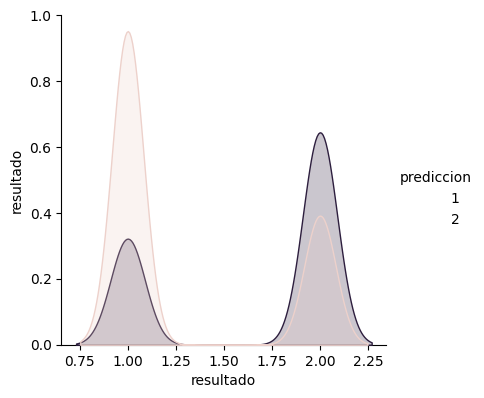

In [21]:
sb.pairplot(tabla_completa.dropna(), hue='prediccion',size=4,vars=["resultado"],kind='reg')

In [22]:
X = np.array(tabla_completa.drop('prediccion', axis=1))
y = np.array(tabla_completa['prediccion'])
X.shape

(9192, 15)

In [23]:
from sklearn.model_selection import train_test_split
pronostico_encoded = pd.get_dummies(tabla_completa, columns=['CASA', 'VISITA'])
X = pronostico_encoded.drop('prediccion', axis=1)
y = pronostico_encoded['prediccion']
# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#model = linear_model.LogisticRegression(solver='liblinear')
model = linear_model.LogisticRegression(solver='newton-cg', penalty='l2', C=1.0, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

c:\Users\David Pineda\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\David Pineda\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


LogisticRegression(class_weight='balanced', random_state=42, solver='newton-cg')

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear','sag'],
    'class_weight': [None, 'balanced', {1: 1, 2: 2}]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

c:\Users\David Pineda\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\David Pineda\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\David Pineda\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\David Pineda\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\U

In [25]:
best_model

LogisticRegression(C=1, random_state=42, solver='newton-cg')

In [26]:
predictions = best_model.predict(X_test)
print(predictions[0:5])

[1 1 1 1 2]


In [27]:
best_model.score(X_test,y_test)

1.0

In [28]:
print(confusion_matrix(y_test, predictions))

[[1041    0]
 [   0  798]]


In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1041
           2       1.00      1.00      1.00       798

    accuracy                           1.00      1839
   macro avg       1.00      1.00      1.00      1839
weighted avg       1.00      1.00      1.00      1839



In [30]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Supongamos que best_model es tu modelo entrenado y X_train, y_train son tus datos de entrenamiento.

# Crear el objeto KFold con 45 splits y sin shuffle
kf = KFold(n_splits=21, shuffle=False, random_state=None)

# Realizar la validación cruzada y obtener las predicciones
predictions = cross_val_predict(best_model, X_train, y_train, cv=kf)

# Puedes evaluar el rendimiento usando alguna métrica, como la precisión
accuracy = accuracy_score(y_train, predictions)
print(f"Accuracy: {accuracy}")

c:\Users\David Pineda\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\David Pineda\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\David Pineda\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\David Pineda\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\U

Accuracy: 0.9997280021759826


In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import numpy as np

# Supongamos que best_model es tu modelo entrenado y X_train, y_train son tus datos de entrenamiento.

# Crear el objeto KFold con 45 splits y sin shuffle
kf = KFold(n_splits=21, shuffle=False, random_state=None)

# Obtener la forma de la matriz de confusión
num_classes = len(np.unique(y_train))
conf_matrix_sum = np.zeros((num_classes, num_classes))

# Realizar la validación cruzada y calcular la matriz de confusión en cada iteración
for train_index, test_index in kf.split(X_train):
    X_test_fold, y_test_fold = X_train.iloc[test_index], y_train.iloc[test_index]
    
    # Obtener las predicciones en el conjunto de prueba actual
    fold_predictions = best_model.predict(X_test_fold)
    
    # Calcular la matriz de confusión para el conjunto de prueba actual
    fold_conf_matrix = confusion_matrix(y_test_fold, fold_predictions, labels=np.unique(y_train))
    
    # Agregar la matriz de confusión al acumulador
    conf_matrix_sum += fold_conf_matrix

# Imprimir la matriz de confusión acumulativa
print("Matriz de Confusión acumulativa:")
print(conf_matrix_sum)

Matriz de Confusión acumulativa:
[[4113.    0.]
 [   0. 3240.]]


In [32]:
import joblib

# Save the model
joblib.dump(model, 'modelologistico_al.pkl')

['modelologistico_al.pkl']

In [33]:
proximos = pd.read_excel("partidos_NBA.xlsx", sheet_name= 'Hoja1')
proximos = proximos.dropna(subset=["bookmaker1"])
proximos["CASA"] = proximos["CASA"].str.replace(" ", "")
proximos["VISITA"] = proximos["VISITA"].str.replace(" ", "")
proximos.reset_index(drop=True, inplace=True)
display(proximos)

,num_partido,CASA,VISITA,bookmaker1,bookmaker2
0,32,Denver,Minnesota,1.48,2.47
1,33,Cleveland,Orlando,1.54,2.32
2,34,newyork,Indiana,1.37,2.84
3,35,OklahomaCity,Dallas,1.57,2.26


In [34]:
pronosticook = proximos.drop(['bookmaker1', 'bookmaker2'], axis=1)

display(pronosticook)

,num_partido,CASA,VISITA
0,32,Denver,Minnesota
1,33,Cleveland,Orlando
2,34,newyork,Indiana
3,35,OklahomaCity,Dallas


In [35]:
pronosticook = pronosticook.merge(liga_espcasa_visita[['GFc','PAc', 'PDc']], left_on='CASA', right_index=True)

pronosticook

,num_partido,CASA,VISITA,GFc,PAc,PDc
0,32,Denver,Minnesota,117.874194,1.034420,0.958566
1,33,Cleveland,Orlando,113.569620,0.996644,0.964284
3,35,OklahomaCity,Dallas,122.376947,1.073934,0.976867


In [36]:
pronosticook = pd.merge(pronosticook, liga_espcasa_visita[['GFv','PAv','PDv']], left_on='VISITA', right_on='CASA')
pronosticook

,num_partido,CASA,VISITA,GFc,PAc,PDc,GFv,PAv,PDv
0,32,Denver,Minnesota,117.874194,1.034420,0.958566,114.045603,1.010534,0.957858
1,33,Cleveland,Orlando,113.569620,0.996644,0.964284,107.517460,0.952689,0.972896
2,35,OklahomaCity,Dallas,122.376947,1.073934,0.976867,116.183871,1.029481,1.013755


In [37]:
pronosticook['gc']=pronosticook['GFc']*(((pronosticook['PAc'])*(pronosticook['PDv'])))
pronosticook['gv']=pronosticook['GFv']*(((pronosticook['PAv'])*(pronosticook['PDc'])))
pronosticook['win_pctC']=pronosticook['gc']/(((pronosticook['gc'])+(pronosticook['gv'])))
pronosticook = pronosticook.sort_values(by="num_partido")

pronosticook[0:10]

,num_partido,CASA,VISITA,GFc,PAc,PDc,GFv,PAv,PDv,gc,gv,win_pctC
0,32,Denver,Minnesota,117.874194,1.034420,0.958566,114.045603,1.010534,0.957858,116.792973,110.471763,0.513907
1,33,Cleveland,Orlando,113.569620,0.996644,0.964284,107.517460,0.952689,0.972896,110.120723,98.772282,0.527163
2,35,OklahomaCity,Dallas,122.376947,1.073934,0.976867,116.183871,1.029481,1.013755,133.232487,116.842158,0.532771


In [38]:
# Predecir nuevos valores de gc y gv
nuevos_datos1 = pronosticook[['PAc', 'PDv']]
nuevos_datos2=pronosticook[['PAv', 'PDc']]
nuevos_gc = modelo_gc.predict(nuevos_datos1)
nuevos_gv = modelo_gv.predict(nuevos_datos2)

# Actualizar los valores de gc y gv en el DataFrame
pronosticook['gc'] = nuevos_gc
pronosticook['gv'] = nuevos_gv

# Imprimir el DataFrame actualizado
pronosticook

,num_partido,CASA,VISITA,GFc,PAc,PDc,GFv,PAv,PDv,gc,gv,win_pctC
0,32,Denver,Minnesota,117.874194,1.034420,0.958566,114.045603,1.010534,0.957858,118.315751,110.673158,0.513907
1,33,Cleveland,Orlando,113.569620,0.996644,0.964284,107.517460,0.952689,0.972896,111.279575,98.328985,0.527163
2,35,OklahomaCity,Dallas,122.376947,1.073934,0.976867,116.183871,1.029481,1.013755,133.997843,116.991297,0.532771


In [39]:
# Realizar la codificación one-hot en el dataframe "proximos"
proximos_encoded = pd.get_dummies(pronosticook, columns=['CASA', 'VISITA'])

In [40]:
# Esto es importante para asegurarse de que el modelo pueda hacer predicciones correctamente
proximos_encoded = proximos_encoded.reindex(columns=X.columns, fill_value=0)

In [41]:
# Utilizar el modelo para hacer predicciones en los nuevos datos
predicciones = best_model.predict(proximos_encoded)

# Agregar las predicciones al dataframe "proximos"
proximos['prediccion'] = predicciones

proximos[['gc','gv']] = pronosticook[['gc','gv']]

display(proximos)

ValueError: Length of values (3) does not match length of index (4)

In [ ]:
from scipy.stats import poisson

# Valores esperados de los equipos
lambda1 = proximos['gc']
lambda2 = proximos['gv']

# Generación de la matriz de probabilidades de Poisson
matriz_poisson = [[poisson.pmf(i, lambda1) * poisson.pmf(j, lambda2) for j in range(0, 10)] for i in range(0, 10)]

In [ ]:
# Definir función para calcular la probabilidad Poisson
def poisson_prob(k, lamb):
    return (lamb ** k) * np.exp(-lamb) / np.math.factorial(k)

# Iterar sobre las filas de la tabla pronosticook y calcular las probabilidades
for index, row in proximos.iterrows():
    lambda_local = row['gc']/7
    lambda_visitante = row['gv']/7
    proximos.loc[index, 'prob_localpoisson'] = sum([poisson_prob(j, lambda_local) * poisson_prob(k, lambda_visitante) for j in range(0, 10) for k in range(0, j)])
    proximos.loc[index, 'prob_empatepoisson'] = sum([poisson_prob(j, lambda_local) * poisson_prob(j, lambda_visitante) for j in range(0, 10)])
    proximos.loc[index, 'prob_visitantepoisson'] = sum([poisson_prob(j, lambda_local) * poisson_prob(k, lambda_visitante) for j in range(0, 10) for k in range(j+1, 10)])
    if proximos[['prob_localpoisson', 'prob_empatepoisson', 'prob_visitantepoisson']].idxmax(axis=1)[index] == 'prob_localpoisson':
        proximos.loc[index, 'prediccion1'] = 'Local'
    elif proximos[['prob_localpoisson', 'prob_empatepoisson', 'prob_visitantepoisson']].idxmax(axis=1)[index] == 'prob_visitantepoisson':
        proximos.loc[index, 'prediccion1'] = 'Visitante'
    else:
        proximos.loc[index, 'prediccion1'] = 'Empate'

# Imprimir la tabla actualizada
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(proximos)

C:\Users\David Pineda\AppData\Local\Temp\ipykernel_24960\2193740476.py:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (lamb ** k) * np.exp(-lamb) / np.math.factorial(k)
C:\Users\David Pineda\AppData\Local\Temp\ipykernel_24960\2193740476.py:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (lamb ** k) * np.exp(-lamb) / np.math.factorial(k)
C:\Users\David Pineda\AppData\Local\Temp\ipykernel_24960\2193740476.py:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (lamb ** k) * np.exp(-lamb) / np.math.factorial(k)
C:\Users\David Pineda\AppData\Local\Temp\ipykernel_24960\2193740476.py:3: DeprecationWarning: `np.math` is a deprecated alias for 

,num_partido,CASA,VISITA,bookmaker1,bookmaker2,prediccion,gc,gv,prob_localpoisson,prob_empatepoisson,prob_visitantepoisson,prediccion1
0,26,Boston,Miami,1.06,7.40,1,126.089925,97.226069,0.000713,0.000581,0.000459,Local
1,27,LAClippers,Dallas,2.15,1.62,2,116.232678,117.491318,0.000298,0.000333,0.000303,Empate
2,28,Indiana,Milwaukee,1.28,3.33,1,141.040473,124.356685,0.000026,0.000032,0.000022,Empate
3,29,Philadelphia,NewYork,1.57,2.26,2,114.654643,113.143787,0.000472,0.000498,0.000462,Empate
4,30,Orlando,Cleveland,1.56,2.27,1,107.175782,99.399224,0.002214,0.001902,0.001940,Local
5,31,Denver,Minnesota,1.50,2.41,1,118.420277,110.813664,0.000440,0.000448,0.000394,Empate


In [ ]:
proximos1=proximos.drop(['prob_empatepoisson','prob_localpoisson','prob_visitantepoisson'], axis=1)
proximos1

,num_partido,CASA,VISITA,bookmaker1,bookmaker2,prediccion,gc,gv,prediccion1
0,26,Boston,Miami,1.06,7.40,1,126.089925,97.226069,Local
1,27,LAClippers,Dallas,2.15,1.62,2,116.232678,117.491318,Empate
2,28,Indiana,Milwaukee,1.28,3.33,1,141.040473,124.356685,Empate
3,29,Philadelphia,NewYork,1.57,2.26,2,114.654643,113.143787,Empate
4,30,Orlando,Cleveland,1.56,2.27,1,107.175782,99.399224,Local
5,31,Denver,Minnesota,1.50,2.41,1,118.420277,110.813664,Empate


In [ ]:
proximos1['prob_local']=proximos['prob_localpoisson']/(proximos['prob_localpoisson']+proximos['prob_visitantepoisson'])
proximos1['prob_visitante']=abs(proximos1['prob_local']-1)
proximos1

,num_partido,CASA,VISITA,bookmaker1,bookmaker2,prediccion,gc,gv,prediccion1,prob_local,prob_visitante
0,26,Boston,Miami,1.06,7.40,1,126.089925,97.226069,Local,0.608639,0.391361
1,27,LAClippers,Dallas,2.15,1.62,2,116.232678,117.491318,Empate,0.495555,0.504445
2,28,Indiana,Milwaukee,1.28,3.33,1,141.040473,124.356685,Empate,0.548937,0.451063
3,29,Philadelphia,NewYork,1.57,2.26,2,114.654643,113.143787,Empate,0.505543,0.494457
4,30,Orlando,Cleveland,1.56,2.27,1,107.175782,99.399224,Local,0.533027,0.466973
5,31,Denver,Minnesota,1.50,2.41,1,118.420277,110.813664,Empate,0.527640,0.472360


In [ ]:
proximos=proximos1

In [ ]:
proximos['kelly1']= (proximos['bookmaker1']*proximos['prob_local']-1)/(proximos['bookmaker1']-1)

proximos['kelly2']= (proximos['bookmaker2']*proximos['prob_visitante']-1)/(proximos['bookmaker2']-1)

display(proximos)

,num_partido,CASA,VISITA,bookmaker1,bookmaker2,prediccion,gc,gv,prediccion1,prob_local,prob_visitante,kelly1,kelly2
0,26,Boston,Miami,1.06,7.40,1,126.089925,97.226069,Local,0.608639,0.391361,-5.914037,0.296261
1,27,LAClippers,Dallas,2.15,1.62,2,116.232678,117.491318,Empate,0.495555,0.504445,0.056907,-0.294837
2,28,Indiana,Milwaukee,1.28,3.33,1,141.040473,124.356685,Empate,0.548937,0.451063,-1.062003,0.215468
3,29,Philadelphia,NewYork,1.57,2.26,2,114.654643,113.143787,Empate,0.505543,0.494457,-0.361926,0.093233
4,30,Orlando,Cleveland,1.56,2.27,1,107.175782,99.399224,Local,0.533027,0.466973,-0.300852,0.047266
5,31,Denver,Minnesota,1.50,2.41,1,118.420277,110.813664,Empate,0.527640,0.472360,-0.417079,0.098147


In [ ]:
# filtrar los partidos con predicción local y kelly1 mayor a cero
filtro_local = (proximos['prediccion'] == 1) & (proximos['kelly1'] > 0)
tabla_local = proximos.loc[filtro_local, ['CASA', 'VISITA', 'gc', 'gv', 'prob_local','prediccion','bookmaker1', 'kelly1']]
tabla_local.rename(columns={'prob_local': 'probabilidad', 'bookmaker1': 'bookmaker', 'kelly1': 'kelly'}, inplace=True)

# filtrar los partidos con predicción visitante y kelly2 mayores a cero
filtro_visitante = (proximos['prediccion'] == 2) & (proximos['kelly2'] > 0)
tabla_visitante = proximos.loc[filtro_visitante, ['CASA', 'VISITA', 'gc', 'gv','prob_visitante','prediccion','bookmaker2', 'kelly2']]
tabla_visitante.rename(columns={'prob_visitante': 'probabilidad','bookmaker2': 'bookmaker', 'kelly2': 'kelly'}, inplace=True)

# unir las tres tablas en una sola consolidada
tablas = [tabla_local, tabla_visitante]
partidos_apuestaesp = pd.concat(tablas)

display(partidos_apuestaesp)

,CASA,VISITA,gc,gv,probabilidad,prediccion,bookmaker,kelly
3,Philadelphia,NewYork,114.654643,113.143787,0.494457,2,2.26,0.093233


In [ ]:
# guardar los resultados en un archivo excel
partidos_apuestaesp.to_excel('apuestasligaNBA.xlsx', index=False)